# Four wave mixing simulation

In [1]:
import numpy as np

# Conservation of energy
$$
2 \omega_{p} = \omega_{s} + \omega_{i}
$$

$\omega_{s}$ is the signal frequency which corresponds to the shorter wavelength photon produced in four wave mixing.  
$\omega_{i}$ is the idler frequency which corresponds to the longer wavelength photon produced in four wave mixing process.  
$\omega_{p}$ is the pump frequency

# Conservation of momentum
$$
2\beta(\omega_{p}) = \beta(\omega_{s}) + \beta(\omega_{i}) + 2\gamma P
$$
Subtracting all onto one side gives
$$
2\beta(\omega_{p}) - \beta(\omega_{s}) - \beta(\omega_{i}) - 2\gamma P = 0
$$

$\gamma$ is approximately $0.2Wm^{-1}$  and $P$ is approximately equal to $100W$

Mid IR wavelengths range roughly from 2500–25000nm  
This corresponds to frequencies of 1.2*10^13 to 1.2*10^14  
Which corresponds to angular frequencies of 2 $\pi$ * these frequencies

Will be using 1 micron to 1.6 microns for pump wavelength, with 100 points for spacing.  
Signal needs a slightly larger range because the solution we are expecting is steeper in the shorter wavelength range.  
100 by 100 matrices should work fine. Anything bigger than 200 by 200 will be too slow.

In [2]:
#import RefractiveIndexClass

In [3]:
import sys
# module_path = r"C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\FYP_Github_V2\Modules\Refractive_Indices"
#module_path = "C:\\Users\\molly\\OneDrive - University of Bath\\Uni\\Final Year\\Project\\FYP_Github_V2\\Modules\\Refractive_Indices"
sys.path.append("../Modules/Refractive_Indices/")

# Now you can import the class from the module
from RefractiveIndexClass import RefractiveIndex

In [4]:
# Function to convert wavelength to angular frequency
def lambda_to_ang_freq(wavelength_matrix):
    #return (2*np.pi*3e8*RefractiveIndexClass.RefractiveIndex.n_fs(wavelength_matrix*1.0e-9,parameter="wavelength")) / wavelength_matrix
    return (2*np.pi*3e8) / wavelength_matrix

In [5]:
# PUMP WAVELENGTH MATRIX

def create_pump_matrix(rows, columns, start_value, step):
    matrix = np.zeros((rows, columns))
    for i in range(columns):
        matrix[:, i] = np.full(rows, start_value + i * step)
    return matrix

# Number of rows and columns, start and end values for the pump wavelengths, and spacing between each column value
rows = 1000
columns = 1000
start_value = 0.7e-6 #1 micron in m
end_value = 1.6e-6
step = (end_value - start_value) / columns

pump_wavelength_matrix = create_pump_matrix(rows, columns, start_value, step)

pump_frequency_matrix = lambda_to_ang_freq(pump_wavelength_matrix)

# for i in range(pump_frequency_matrix.shape[0]):
#     for j in range(pump_frequency_matrix.shape[1]):
#         pump_frequency_matrix[i, j] = pump_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(pump_frequency_matrix[i, j],parameter="omega")

#print(pump_frequency_matrix)

pump_wavelength_matrix

array([[7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       ...,
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06],
       [7.0000e-07, 7.0090e-07, 7.0180e-07, ..., 1.5973e-06, 1.5982e-06,
        1.5991e-06]])

In [6]:
#SIGNAL WAVELENGTH MATRIX

def create_signal_matrix(rows, columns, min_value, max_value):
    matrix = np.zeros((rows, columns))
    for i in range(columns):
        matrix[:, i] = np.linspace(min_value, max_value, rows)
    return matrix

# Example usage
rows = 1000
columns = 1000
min_value = 1.0e-6
max_value = 1.6e-6

signal_wavelength_matrix = create_signal_matrix(rows, columns, min_value, max_value)
signal_frequency_matrix = lambda_to_ang_freq(signal_wavelength_matrix)

# for i in range(signal_frequency_matrix.shape[0]):
#     for j in range(signal_frequency_matrix.shape[1]):
#         signal_frequency_matrix[i, j] = signal_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(signal_frequency_matrix[i, j],parameter="omega")

print(signal_wavelength_matrix)

[[1.0000000e-06 1.0000000e-06 1.0000000e-06 ... 1.0000000e-06
  1.0000000e-06 1.0000000e-06]
 [1.0006006e-06 1.0006006e-06 1.0006006e-06 ... 1.0006006e-06
  1.0006006e-06 1.0006006e-06]
 [1.0012012e-06 1.0012012e-06 1.0012012e-06 ... 1.0012012e-06
  1.0012012e-06 1.0012012e-06]
 ...
 [1.5987988e-06 1.5987988e-06 1.5987988e-06 ... 1.5987988e-06
  1.5987988e-06 1.5987988e-06]
 [1.5993994e-06 1.5993994e-06 1.5993994e-06 ... 1.5993994e-06
  1.5993994e-06 1.5993994e-06]
 [1.6000000e-06 1.6000000e-06 1.6000000e-06 ... 1.6000000e-06
  1.6000000e-06 1.6000000e-06]]


In [7]:
# CALCULATION TO GET IDLER WAVELENGTH MATRIX

#idler_wavelength_matrix = 2*pump_wavelength_matrix - signal_wavelength_matrix #Using cons of energy equation

idler_frequency_matrix = 2*pump_frequency_matrix - signal_frequency_matrix

# for i in range(idler_frequency_matrix.shape[0]):
#     for j in range(idler_frequency_matrix.shape[1]):
#         idler_frequency_matrix[i, j] = idler_frequency_matrix[i,j]*RefractiveIndexClass.RefractiveIndex.n_fs(idler_frequency_matrix[i, j],parameter="omega")

idler_frequency_matrix

array([[3.50063181e+15, 3.49371638e+15, 3.48681868e+15, ...,
        4.75221697e+14, 4.73892602e+14, 4.72565003e+14],
       [3.50176324e+15, 3.49484780e+15, 3.48795011e+15, ...,
        4.76353123e+14, 4.75024028e+14, 4.73696429e+14],
       [3.50289331e+15, 3.49597787e+15, 3.48908017e+15, ...,
        4.77483192e+14, 4.76154097e+14, 4.74826498e+14],
       ...,
       [4.20660504e+15, 4.19968960e+15, 4.19279191e+15, ...,
        1.18119492e+15, 1.17986583e+15, 1.17853823e+15],
       [4.20704777e+15, 4.20013233e+15, 4.19323463e+15, ...,
        1.18163765e+15, 1.18030855e+15, 1.17898096e+15],
       [4.20749016e+15, 4.20057473e+15, 4.19367703e+15, ...,
        1.18208004e+15, 1.18075095e+15, 1.17942335e+15]])

# Turning above code into a function

In [8]:
def BuildMatrixFromArray(array, n=-1, repeat_array_as = "columns"):
    if n == -1: n = len(array)
    if repeat_array_as.lower() == "columns":
        constructed_matrix = np.zeros((len(array), n))
        for i in range(n):
            constructed_matrix[:, i] = np.transpose(array)
        return constructed_matrix
    elif repeat_array_as.lower() == "rows":
        constructed_matrix = np.zeros((n, len(array)))
        for i in range(n):
            constructed_matrix[i, :] = array
        return constructed_matrix
    else:
        return ValueError("Argument given for 'repeat_array_as' is unrecognised. It takes arguments 'rows' or 'columns'")

In [9]:
# Function to convert wavelength to angular frequency
def lambda_to_ang_freq(wavelength_matrix):
    #return (2*np.pi*3e8*RefractiveIndexClass.RefractiveIndex.n_fs(wavelength_matrix*1.0e-9,parameter="wavelength")) / wavelength_matrix
    #return (2*np.pi*3e8) / wavelength_matrix
    return (2*np.pi*3e8) / wavelength_matrix

In [10]:
gamma = 2e-4 #Unit is m^-1 W^-1
P = 100 # W

<ipython-input-11-eae20b718204>:18: RuntimeWarning: divide by zero encountered in true_divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
<ipython-input-11-eae20b718204>:43: UserWarning: The following kwargs were not used by contour: 'color'
  phase_matching_contour = plt.contour(pump_wavelengths, signal_wa

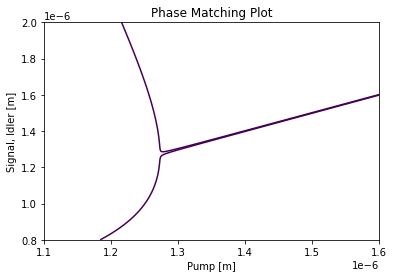

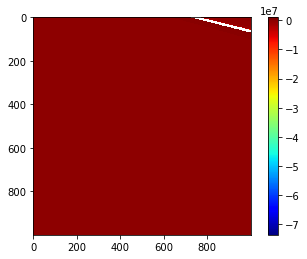

array([[ -4451.50536797,  -4439.7673529 ,  -4427.8852916 , ...,
        -79066.18672137, -78403.220932  ,             nan],
       [ -4418.81395736,  -4407.38565455,  -4395.81521538, ...,
        -82194.01527178, -81529.97948271, -80866.70043505],
       [ -4385.9770584 ,  -4374.85263982,  -4363.58796268, ...,
        -85321.82698385, -84655.40778574, -83990.02291223],
       ...,
       [ -5368.41937794,  -5334.91750976,  -5301.52522576, ...,
          2034.65042846,   2031.52576914,   2028.39676708],
       [ -5370.86696154,  -5337.33016952,  -5303.90302951, ...,
          2045.28787766,   2042.1609828 ,   2039.02972   ],
       [ -5373.29212848,  -5339.72044144,  -5306.25847418, ...,
          2055.94641509,   2052.81730778,   2049.68380737]])

In [11]:
import matplotlib.pyplot as plt

# Input wavelengths in SI units [m]
def phase_matching(pump_wavelengths, signal_wavelengths, refractive_index, gamma = 2e-4, P = 100, show_plots = True):
    # *** Construct the pump and signal matrices *** #
    pump_matrix_wavelengths = BuildMatrixFromArray(pump_wavelengths, len(signal_wavelengths), repeat_array_as = "rows")
    signal_matrix_wavelengths = BuildMatrixFromArray(signal_wavelengths, len(pump_wavelengths), repeat_array_as = "columns")

    # *** Convert to frequency *** #
    pump_matrix_omegas = lambda_to_ang_freq(pump_matrix_wavelengths)
    signal_matrix_omegas = lambda_to_ang_freq(signal_matrix_wavelengths)
    
    # *** Conservation of energy to create idler matrix *** #
    idler_matrix_omegas = 2 * pump_matrix_omegas - signal_matrix_omegas
    
    
    # *** Slightly different conversion needed for wavelength version *** #
    idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))
    
    #idler_matrix_wavelengths = 2 * pump_matrix_wavelengths - signal_matrix_wavelengths

    
    # *** Find the betas *** #
    pump_betas = refractive_index(pump_matrix_wavelengths*1e9) * pump_matrix_omegas / 3e8
    # print("pump betas")
    # print(pump_betas)
    signal_betas = refractive_index(signal_matrix_wavelengths*1e9) * signal_matrix_omegas / 3e8
    # print("signal betas")
    # print(signal_betas)
    idler_betas = refractive_index(idler_matrix_wavelengths*1e9) * idler_matrix_omegas / 3e8
    # print("wavelength idler matrix")
    # print(idler_betas)

    # *** Phase matching: Momentum conservation *** #
    delta_beta = 2 * pump_betas - signal_betas - idler_betas - 2 * gamma * P
    # plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
    # plt.colorbar()  # Add colorbar to show the scale
    # plt.show()
  
    
    # plt.plot(contour_data)
    if show_plots == True:
        phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')
        contour_data = phase_matching_contour.collections[0].get_paths()[0].vertices
        plt.xlabel('Pump [m]')
        plt.ylabel('Signal, Idler [m]')
        plt.title('Phase Matching Plot')  
        plt.show() 
        plt.imshow(delta_beta, cmap='jet', interpolation='nearest')
        plt.colorbar()  # Add colorbar to show the scale
        plt.show()
    return delta_beta
    #print(contour_data)

pump_wavelengths = np.linspace(1.1e-6, 1.6e-6, 1000)
signal_wavelengths = np.linspace(0.8e-6, 2.0e-6, 1000)
#refractive_index = RefractiveIndexClass.RefractiveIndex.n_fs
refractive_index = RefractiveIndex.n_fs
phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index) 

# <u> Phase matching diagram for HCF </u>

Should basically be identical code except plugging in the refractive index that we modelled for leaky mode HCFs (add this as a function to refractive index class)

<ipython-input-11-eae20b718204>:43: UserWarning: The following kwargs were not used by contour: 'color'
  phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')


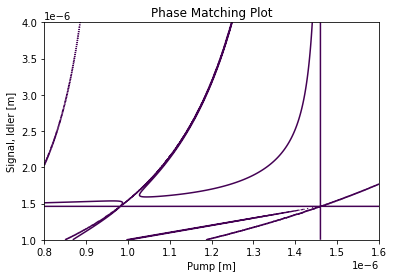

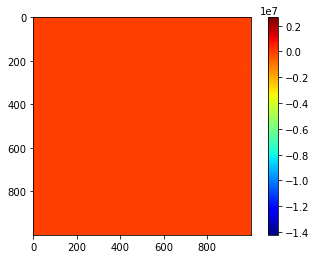

array([[ 158.97853948,  158.01676728,  157.08732544, ..., 2784.04509031,
        2794.58022566, 2805.22170537],
       [ 160.84631102,  159.86484091,  158.91494872, ..., 2719.44313857,
        2729.53389767, 2739.72667548],
       [ 162.75187564,  161.75170286,  160.78241724, ..., 2657.29490809,
        2666.96559238, 2676.73430835],
       ...,
       [3581.0154051 , 3579.0258175 , 3577.05590902, ..., 2803.36891378,
        2800.11030245, 2796.87722467],
       [3585.37912646, 3583.38935802, 3581.41926552, ..., 2807.54057905,
        2804.28162259, 2801.04819887],
       [3589.7450003 , 3587.75505156, 3585.78477559, ..., 2811.7147749 ,
        2808.45547417, 2805.22170537]])

In [12]:
pump_wavelengths = np.linspace(0.8e-6, 1.6e-6, 1000)
signal_wavelengths = np.linspace(1.0e-6, 4.0e-6, 1000)

# * * * HCF Parameters * * * #
w = 0.7e-6
R = 24e-6
gas_pressure = 210000 # mbar
gas_temperature = 300 # Kelvin
#refractive_index = RefractiveIndexClass.RefractiveIndex.n_fs
refractive_index = RefractiveIndex.HCF
phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index) 

## <u> Phase Matching with Noble Gas </u>

In [13]:
m = [1]
def find_loss_wavelengths(w, n_gas, n_wall, wavelengths, ms):
    lambda_ms = []
    for m in ms:
        # print(n_wall(wavelengths*1e9))
        m_val = (2 * n_gas(wavelengths*1e9) * w / wavelengths) * ( (n_wall(wavelengths * 1e9) / n_gas(wavelengths * 1e9))**2 - 1 )**(1/2)
        # print("M_val")
        # print(m_val)
        differences = np.abs(m - m_val)
        # print(differences)
        idx = np.where(min(differences) == differences)[0]
        lambda_ms.append((wavelengths[idx], m))
    return lambda_ms

In [14]:
# Function for custom ticks in wavelength on a frequency plot
def WavelengthTicksOnAngularFrequencyPlot(min_wavelength, max_wavelength, No_major_ticks, axis = 'x'):
    from matplotlib.ticker import FixedLocator, FuncFormatter
    major_wavelengths = np.linspace(min_wavelength, max_wavelength, No_major_ticks)
    # Calculate the corresponding frequencies for the major ticks
    major_frequencies = 2 * np.pi * 3e8 / major_wavelengths
    minor_ticks = np.linspace(min_wavelength, max_wavelength, 4*No_major_ticks + 2)
    minor_ticks = lambda_to_ang_freq(minor_ticks)
    # Apply the custom transformation to the x-axis ticks
    if axis == 'x':
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{lambda_to_ang_freq(x)*1e6:.2f}'))
        plt.gca().xaxis.set_major_locator(FixedLocator(major_frequencies))
        plt.gca().set_xticks(minor_ticks, minor=True)
    elif axis == 'y':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{lambda_to_ang_freq(x)*1e6:.2f}'))
        plt.gca().yaxis.set_major_locator(FixedLocator(major_frequencies))
        plt.gca().set_yticks(minor_ticks, minor=True)
    
    # print("Minor ticks")
    # print(minor_ticks)
    # plt.gca().xaxis.set_minor_formatter(FuncFormatter(lambda x, _: f'{lambda_to_ang_freq(x)*1e6:.2f}'))
    

In [15]:
# Parameters:
Temperature = 293 # K
Pressure = 5000 # mBar
w = 0.7e-6 # m
core_radius = 22e-6 # m
gas = "xenon"
gamma = 0.0
P_0 = 100
loss_ms = [1]

1.0024126652957621
1.0022820190203985
Resonant wavelength
[1.45645646e-06]


<ipython-input-25-99502a01d8d3>:29: UserWarning: The following kwargs were not used by contour: 'color'
  phase_matching_contour = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')


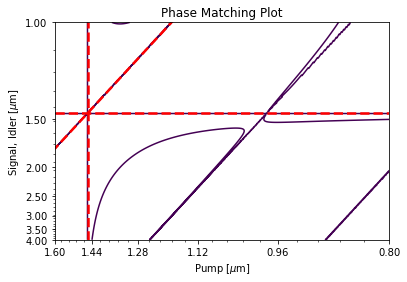

In [25]:


gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=Pressure, temperature=Temperature, gas_name=gas)
print(gas_index(1000))
refractive_index = lambda x: RefractiveIndex.HCF(R=core_radius, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=0.27)
print(refractive_index(1000))
resonsance_wavelengths = find_loss_wavelengths(w = w, n_gas=gas_index, n_wall=RefractiveIndex.n_fs, wavelengths=signal_wavelengths,ms = loss_ms)
# print("test")
# print(resonsance_wavelengths)

delta_beta = phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=P_0, gamma=gamma) 
axis_parameter = "ang_freq"
if axis_parameter.lower() == "wavelength":
    phase_matching_contour = plt.contour(pump_wavelengths, signal_wavelengths, delta_beta, levels=[0], color='k')
    contour_data = phase_matching_contour.collections[0].get_paths()[0].vertices
    for resonsance_wavelength in resonsance_wavelengths:
        print("Resonant wavelength")
        print(resonsance_wavelength[0])
        resonances_linewidth = 2.5
        const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
        plt.plot(pump_wavelengths, const_idlers, color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axvline(resonsance_wavelength[0], color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axhline(resonsance_wavelength[0], color = 'r', linestyle = '--', linewidth = resonances_linewidth)
    plt.xlabel('Pump [m]')
    plt.ylabel('Signal, Idler [m]')
    plt.title('Phase Matching Plot')  
    plt.xlim([min(pump_wavelengths), max(pump_wavelengths)])
    plt.ylim([min(signal_wavelengths), max(signal_wavelengths)])
    plt.show() 
elif axis_parameter.lower() == "ang_freq":
    phase_matching_contour = plt.contour(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], color='k')
    contour_data = phase_matching_contour.collections[0].get_paths()[0].vertices
    for resonsance_wavelength in resonsance_wavelengths:
        print("Resonant wavelength")
        print(resonsance_wavelength[0])
        resonances_linewidth = 2.5
        const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
        plt.plot(lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(const_idlers), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axvline(lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        plt.axhline(lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
    plt.xlabel(r'Pump [$\mu$m]')
    plt.ylabel(r'Signal, Idler [$\mu$m]')
    plt.title('Phase Matching Plot')  
    plt.xlim([min(lambda_to_ang_freq(pump_wavelengths)), max(lambda_to_ang_freq(pump_wavelengths))])
    plt.ylim([min(lambda_to_ang_freq(signal_wavelengths)), max(lambda_to_ang_freq(signal_wavelengths))])

WavelengthTicksOnAngularFrequencyPlot(min(pump_wavelengths), max(pump_wavelengths), 6, axis='x')    
WavelengthTicksOnAngularFrequencyPlot(min(signal_wavelengths), max(signal_wavelengths), 7, axis='y')
# interp_val = phase_matching_contour.collections[0].get_paths()[0].interpolated(delta_beta, lambda_to_ang_freq(pump_wavelengths), lambda_to_ang_freq(signal_wavelengths), lambda_to_ang_freq(1.12e-6), lambda_to_ang_freq(2.5e-6))  
# print(interp_val)  
# interp_val = np.interp([lambda_to_ang_freq(1.12e-6)], lambda_to_ang_freq(pump_wavelengths), delta_beta[np.where(np.isclose(lambda_to_ang_freq(signal_wavelengths), 2.50e-6))])[0]
# print(interp_val)
plt.show() 

### Function to calculate $\gamma$ (the normalised gap between capillaries)

In [2]:
def calculate_gamma(M, w, r_core, r_cap):
    ########## Insert everything in SI ##########
    # Function returns gamma which is normalised gap between capillaries in HCF
    # M = number of capillaries
    # w = capillary wall thickness
    # r_core = core radius
    # r_cap = capillary radius
    g = 2 * ( ( r_cap + w )( np.sin( np.pi / M) - 1 ) + r_core * np.sin( np.pi / M ) )
    return g / r_core

## Interpolating to wavelength rather than frequency in phase matching plot

In [17]:
delta_beta

interpolation = lambda x: 2 * np.pi * 3e17 / x

def linear_interpolation_omega_wavelength(x, y):
    from scipy import interpolate
    x = 2 * np.pi * c / x                                           # Frequency in rad/s
    x_grid = np.linspace(min(x), max(x), len(y))                    # Adjust the number of points as needed        
    linear_interp = interpolate.interp1d(x, y, kind='linear')       # Perform linear interpolation
    y_interp = linear_interp(x_grid)
    return x_grid, y_interp